In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
df = pd.read_csv('../data/delays.csv')
df.dropna(inplace=True)
df = df[df['arr_flights'] > 0]
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['high_delay'] = (df['delay_rate'] > 0.25).astype(int)

In [23]:
le_carrier = LabelEncoder()
le_airport = LabelEncoder()

df['carrier_enc'] = le_carrier.fit_transform(df['carrier'])
df['airport_enc'] = le_airport.fit_transform(df['airport'])

In [24]:
features = [
    'year', 'month', 'carrier_enc', 'airport_enc',
    'arr_cancelled', 'arr_diverted',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'
]
target = 'high_delay'

X = df[features]
y = df[target]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Total samples: 171223
Training samples: 136978
Test samples: 34245


In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     26620
           1       0.77      0.39      0.52      7625

    accuracy                           0.84     34245
   macro avg       0.81      0.68      0.71     34245
weighted avg       0.83      0.84      0.82     34245



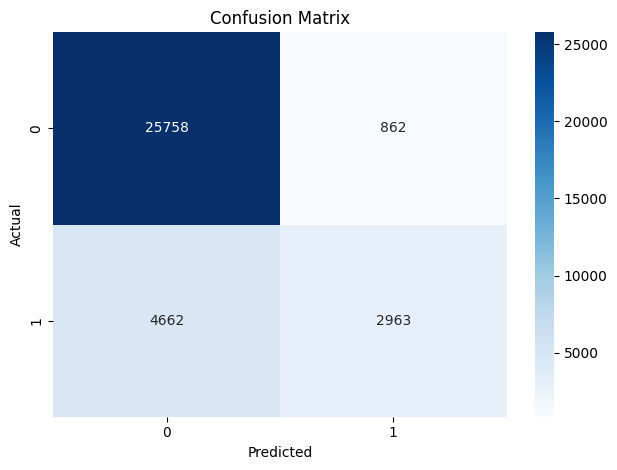

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

late_aircraft_ct: 0.1466
nas_ct: 0.1359
carrier_ct: 0.1314
airport_enc: 0.1201
carrier_enc: 0.1062
month: 0.0958
weather_ct: 0.0826
year: 0.0822
arr_cancelled: 0.0561
arr_diverted: 0.0219
security_ct: 0.0211


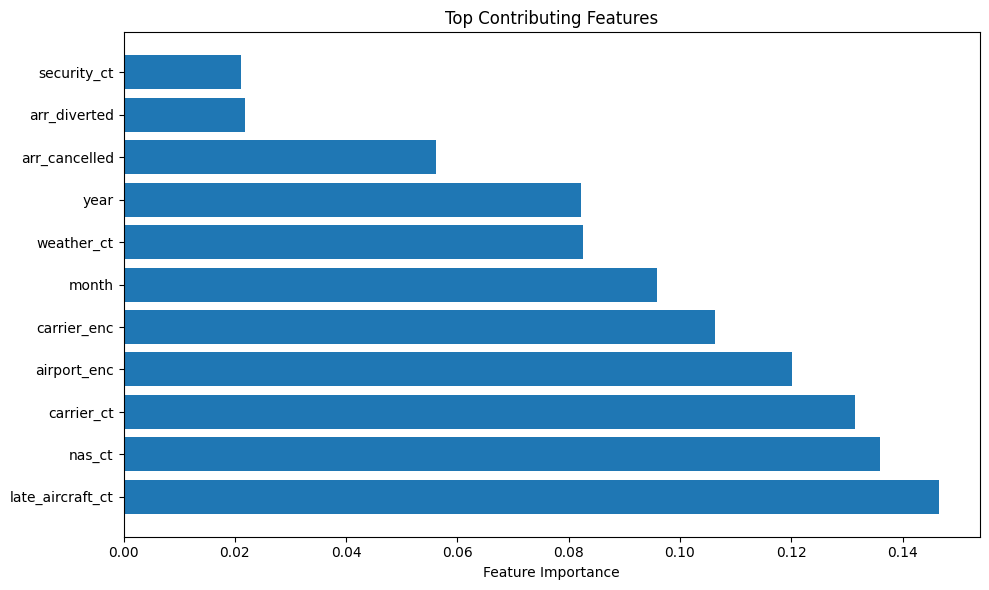

In [30]:
importances = model.feature_importances_

sorted_features = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
for f, score in sorted_features:
    print(f"{f}: {score:.4f}")

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top Contributing Features')
plt.tight_layout()
plt.savefig('../visuals/feature_importance.png')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

np.float64(0.8642305107708982)

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

True Negatives: 25758
False Positives: 862
False Negatives: 4662
True Positives: 2963
